In [1]:
import jyrobot
import math

In [2]:
jyrobot.load()

Searching for jyrobot config files...
Directory: ./
    no files found
Directory: /home/dblank/jyrobot/jyrobot/worlds
    'duck-scribbler-no-walls'
    'two-scribblers-no-walls'
    'two-scribblers-one-wall'
    'two-scribblers'


In [3]:
world = jyrobot.load("duck-scribbler-no-walls")

Random seed initialized to: 5492354420431888834
........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [4]:
world.watch("panel")
world.watch("inline")

Box(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\…

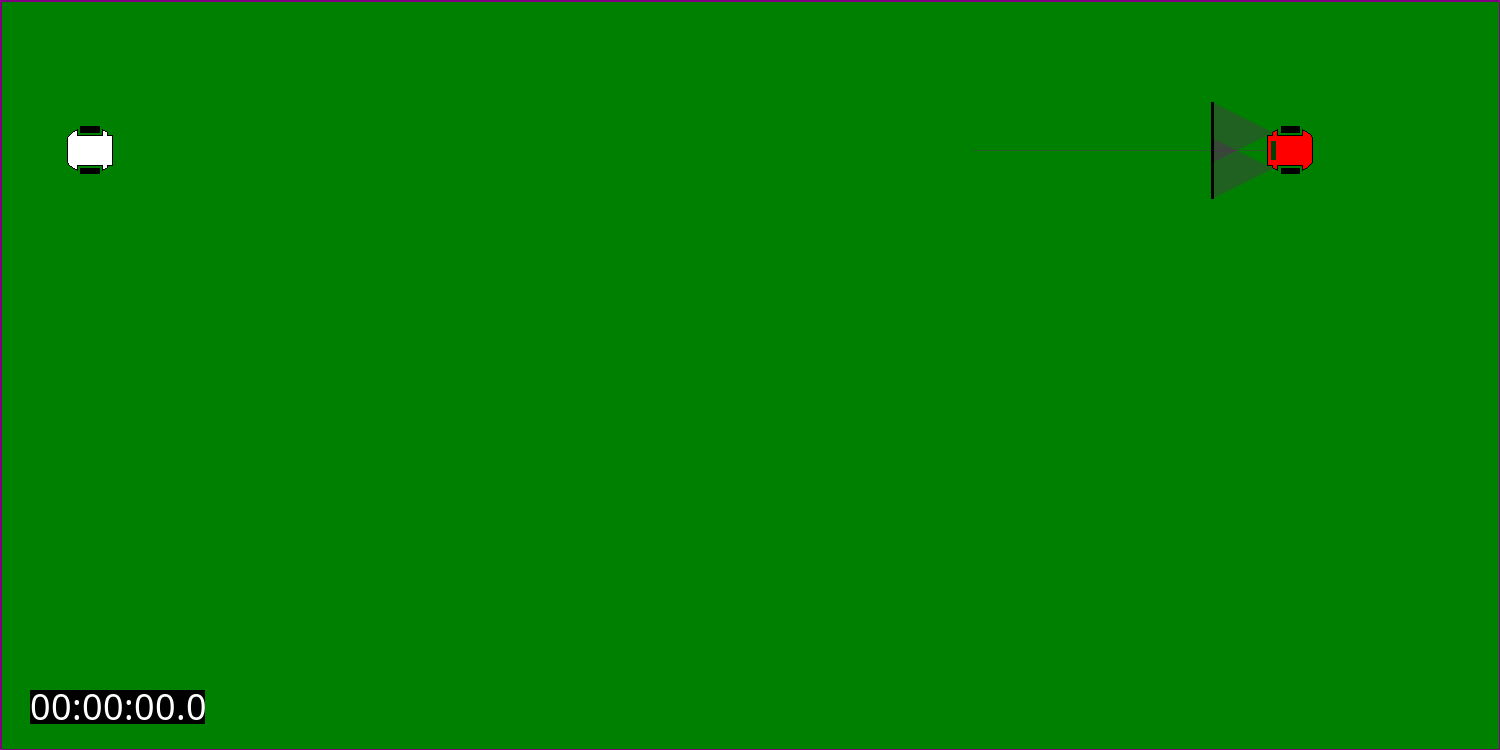

In [5]:
world.take_picture()

In [6]:
world[1].turn(.5)
world[0].forward(1)

In [7]:
world.seconds(10.0)

Simulation stopped at: 00:00:10.0; speed 1.0 x real time


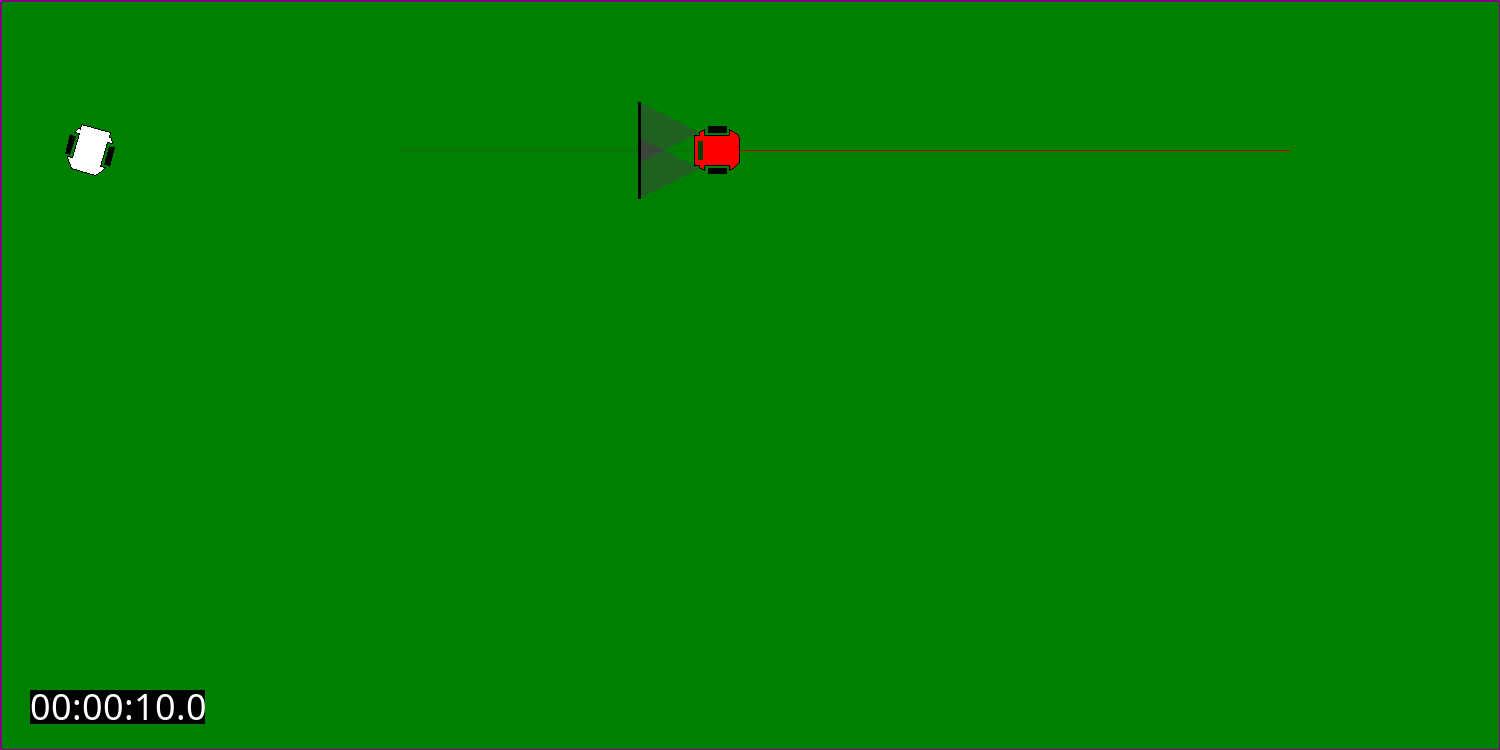

In [8]:
world.take_picture()

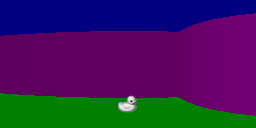

In [9]:
world[0]["Camera"].take_picture()